In [54]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from statistics import mean, median, mode, stdev
import ast
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [55]:
Movie = pd.read_csv('movie_collection_data_revenuedesc.csv',na_filter=True, na_values=['[]','NaN'])
Movie.head()

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage
0,Doo,True,NaN,3000000,0.6,0.0,0,Doo takes Manhattan,NaN,540000000000,NaN,300,en,NaN,NaN,['ba']
1,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000,266.554,8.3,17776,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2797800564,2019-04-24,181,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']"
2,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000,91.055,7.5,23164,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2787965087,2009-12-10,162,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']"
3,Titanic,False,"['Drama', 'Romance']",200000000,76.323,7.9,18970,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2187463944,1997-11-18,194,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']"
4,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000,51.502,7.4,15668,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2068223624,2015-12-15,136,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en']


In [56]:
## Drop INVALID DATA
Numericlist = ['Budget','Popularity','VoteAvg','VoteCount','Revenue','Runtime']
for item in Numericlist:
    Movie[str(item)] = pd.to_numeric(Movie[str(item)], errors='coerce').fillna(0)
Movie_CleanedData = Movie.dropna(subset=['ReleaseDate','SpokenLanguage','ProductionCompany','ProductionCountry','GenreList'])
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Budget']<281)]
Movie_CleanedData = Movie_CleanedData[~(Movie_CleanedData['Revenue']==0)]
Movie_CleanedData.drop_duplicates(subset="Movie_name", inplace =True)
Movie_CleanedData.index = pd.RangeIndex(len(Movie_CleanedData.index))
Movie_CleanedData.index = range(len(Movie_CleanedData.index))



In [57]:
Profit=[]
for i in range(len(Movie_CleanedData)):
    Profit.append(Movie_CleanedData.loc[i,'Revenue']-Movie_CleanedData.loc[i,'Budget'])
Movie_CleanedData.insert(10,"Profit",Profit,True)

Movie_CleanedData['Year'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).year
Movie_CleanedData['Month'] = pd.DatetimeIndex(Movie_CleanedData['ReleaseDate']).month
Movie_CleanedData.head(100)

,Movie_name,Adult,GenreList,Budget,Popularity,VoteAvg,VoteCount,Overview,Tagline,Revenue,Profit,ReleaseDate,Runtime,OriginalLanguage,ProductionCompany,ProductionCountry,SpokenLanguage,Year,Month
0,Avengers: Endgame,False,"['Adventure', 'Science Fiction', 'Action']",356000000.0,266.554,8.3,17776.0,After the devastating events of Avengers: Infi...,Part of the journey is the end.,2.797801e+09,2.441801e+09,2019-04-24,181.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'ja', 'xh']",2019,4
1,Avatar,False,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",237000000.0,91.055,7.5,23164.0,"In the 22nd century, a paraplegic Marine is di...",Enter the World of Pandora.,2.787965e+09,2.550965e+09,2009-12-10,162.0,en,"[['Dune Entertainment', 'US'], ['Lightstorm En...","['US', 'GB']","['en', 'es']",2009,12
2,Titanic,False,"['Drama', 'Romance']",200000000.0,76.323,7.9,18970.0,101-year-old Rose DeWitt Bukater tells the sto...,Nothing on Earth could come between them.,2.187464e+09,1.987464e+09,1997-11-18,194.0,en,"[['Paramount', 'US'], ['Lightstorm Entertainme...",['US'],"['en', 'fr', 'de', 'sv', 'it', 'ru']",1997,11
3,Star Wars: The Force Awakens,False,"['Action', 'Adventure', 'Science Fiction', 'Fa...",245000000.0,51.502,7.4,15668.0,Thirty years after defeating the Galactic Empi...,Every generation has a story.,2.068224e+09,1.823224e+09,2015-12-15,136.0,en,"[['Lucasfilm Ltd.', 'US'], ['Bad Robot', 'US']]",['US'],['en'],2015,12
4,Avengers: Infinity War,False,"['Adventure', 'Action', 'Science Fiction']",300000000.0,283.248,8.3,21470.0,As the Avengers and their allies have continue...,An entire universe. Once and for all.,2.046240e+09,1.746240e+09,2018-04-25,149.0,en,"[['Marvel Studios', 'US']]",['US'],"['en', 'xh']",2018,4
5,Jurassic World,False,"['Action', 'Adventure', 'Science Fiction', 'Th...",150000000.0,68.575,6.6,16686.0,Twenty-two years after the events of Jurassic ...,The park is open.,1.671713e+09,1.521713e+09,2015-06-06,124.0,en,"[['Amblin Entertainment', 'US'], ['Legendary P...",['US'],['en'],2015,6
6,The Lion King,False,"['Adventure', 'Family', 'Animation']",260000000.0,94.877,7.2,7563.0,"Simba idolizes his father, King Mufasa, and ta...",The King has Returned.,1.656943e+09,1.396943e+09,2019-07-12,118.0,en,"[['Walt Disney Pictures', 'US'], ['Fairview En...",['US'],['en'],2019,7
7,The Avengers,False,"['Science Fiction', 'Action', 'Adventure']",220000000.0,139.977,7.7,24419.0,When an unexpected enemy emerges and threatens...,Some assembly required.,1.518816e+09,1.298816e+09,2012-04-25,143.0,en,"[['Marvel Studios', 'US'], ['Paramount', 'US']]",['US'],"['en', 'hi', 'ru']",2012,4
8,Furious 7,False,"['Action', 'Thriller']",190000000.0,73.657,7.3,8239.0,Deckard Shaw seeks revenge against Dominic Tor...,Vengeance Hits Home,1.515048e+09,1.325048e+09,2015-04-01,137.0,en,"[['Abu Dhabi Film Commission', ''], ['Universa...",['US'],['en'],2015,4
9,Frozen II,False,"['Family', 'Animation', 'Adventure', 'Comedy',...",150000000.0,154.917,7.3,7232.0,"Elsa, Anna, Kristoff and Olaf head far into th...",The past is not what it seems.,1.450027e+09,1.300027e+09,2019-11-20,103.0,en,"[['Walt Disney Pictures', 'US'], ['Walt Disney...",['US'],['en'],2019,11


In [58]:
#change string in list format to list
for i in range(len(Movie_CleanedData)):
    x = ast.literal_eval(Movie_CleanedData.loc[i,'GenreList'])
    Movie_CleanedData.at[i,'GenreList'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCompany'])
    Movie_CleanedData.at[i,'ProductionCompany'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'ProductionCountry'])
    Movie_CleanedData.at[i,'ProductionCountry'] = x
    
    x = ast.literal_eval(Movie_CleanedData.loc[i,'SpokenLanguage'])
    Movie_CleanedData.at[i,'SpokenLanguage'] = x


In [59]:
Genre = Movie_CleanedData.set_index('Movie_name').GenreList.apply(pd.Series).stack()
Genre = pd.get_dummies(Genre).groupby(level=0).sum()
Genre = Genre.replace(0,np.nan)
Movie_CleanedData = Movie_CleanedData.set_index('Movie_name')
Genre['Profit'] = Movie_CleanedData.Profit
Genre['Year'] = Movie_CleanedData.Year

In [60]:
Genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Profit,Year
Movie_name,,,,,,,,,,,,,,,,,,,,,
#살아있다,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,7116285.0,2020
'71,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,-7800000.0,2014
'N Beetje Verliefd,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,166214.0,2006
(500) Days of Summer,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,53222734.0,2009
(T)Raumschiff Surprise - Periode 1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,67341401.0,2004


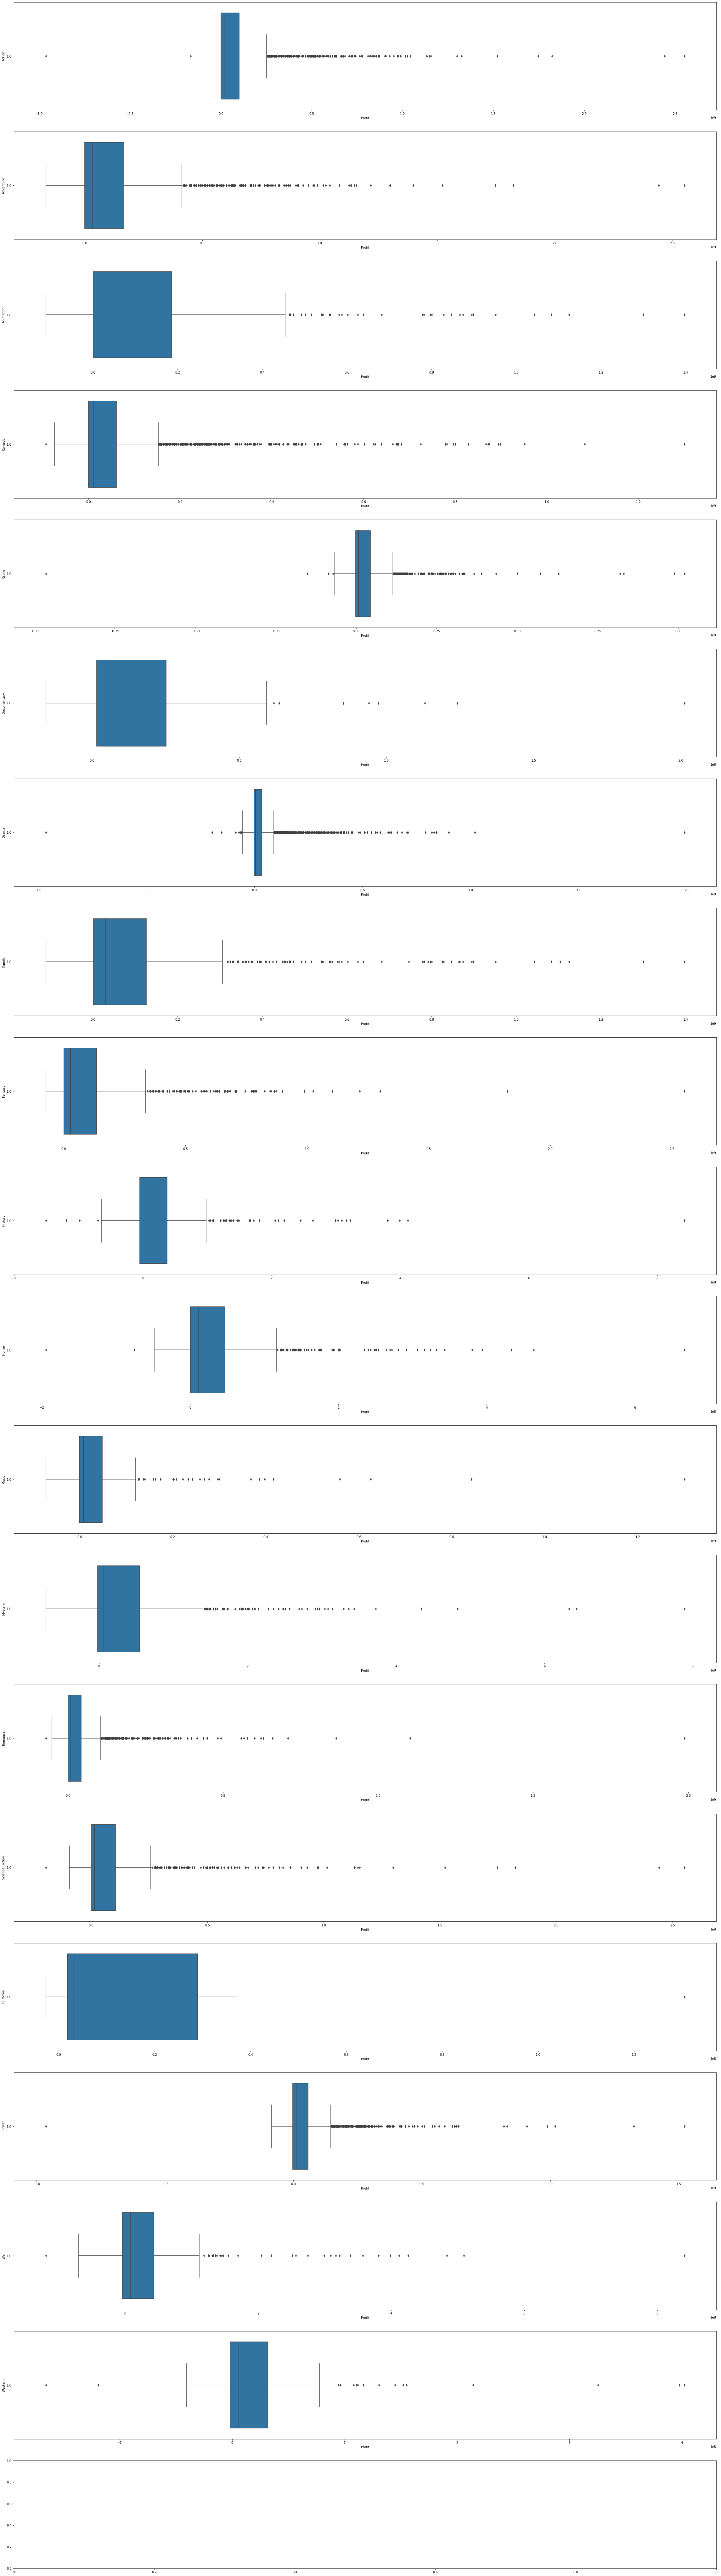

In [8]:
f, axes = plt.subplots(len(Genre.columns)-1, 1, figsize=(40, 150))
count = 0
for var in Genre.columns:
    if var == 'Profit':
        break
    sb.boxplot(y = Genre[var], x = Genre['Profit'], orient = "h", ax = axes[count])
    count+=1

In [64]:
df = Genre.set_index('Year')[['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','History','Horror','Music','Mystery','Romance','Science Fiction','TV Movie','Thriller','War','Western','Profit']].apply(pd.Series).stack()
df = pd.DataFrame(df.sort_index())
df.value_counts()
df.head(10000)

0
Year                              
1913 Crime            1.000000e+00
     Drama            1.000000e+00
     Profit           1.794300e+06
1916 Drama            1.000000e+00
     History          1.000000e+00
     Profit          -4.394751e+06
1918 Comedy           1.000000e+00
     Drama            1.000000e+00
     Profit           7.750000e+06
1919 Drama            1.000000e+00
     Profit           3.480000e+06
1920 Crime            1.000000e+00
     Drama            1.000000e+00
     Profit           2.900000e+06
1922 Drama            1.000000e+00
     Profit          -6.998000e+05
1923 Action           1.000000e+00
     Comedy           1.000000e+00
     Profit           1.379000e+06
     Romance          1.000000e+00
1924 Adventure        1.000000e+00
     Fantasy          1.000000e+00
     Profit           7.822600e+04
     Romance          1.000000e+00
1925 Adventure        1.000000e+00
     Adventure        1.000000e+00
     Comedy           1.000000e+00
     Crime            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Profit           5.100000e+06
     Profit           2.175500e+07
     Profit           1.577000e+06
     Profit           6.010000e+05
     Romance          1.000000e+00
     Romance          1.000000e+00
     Romance          1.000000e+00
     War              1.000000e+00
1926 Drama            1.000000e+00
     Drama            1.000000e+00
     Profit           2.850000e+05
     Profit           5.034230e+05
     Romance          1.000000e+00
1927 Comedy           1.000000e+00
     Documentary      1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Profit           5.446540e+05
     Profit           4.638213e+06
     Romance          1.000000e+00
1928 Adventure        1.000000e+00
     Crime            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Mystery          1.000000e+00
     Profit           1.125000e+06
     Profit           2.140000e+05
     Profit           6.620000e+05
1929 Comedy           1.000000e+00
     Drama            1.000000e+00
     Music            1.000000e+00
     Music            1.000000e+00
     Profit           1.722000e+06
     Profit           3.979000e+06
     Profit           1.300000e+06
     Romance          1.000000e+00
     Romance          1.000000e+00
     Western          1.000000e+00
1930 Action           1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Profit           1.821136e+06
     Profit           4.050000e+06
     War              1.000000e+00
     War              1.000000e+00
1931 Crime            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Horror           1.000000e+00
     Horror           1.000000e+00
     Profit           7.150000e+05
     Profit           1.170900e+07
     Profit           1.669000e+06
     Romance          1.000000e+00
     Science Fiction  1.000000e+00
     Science Fiction  1.000000e+00
1932 Drama            1.000000e+00
     Profit           1.894000e+06
     Romance          1.000000e+00
1933 Comedy           1.000000e+00
     Comedy           1.000000e+00
     Comedy           1.000000e+00
     Comedy           1.000000e+00
     Comedy           1.000000e+00
     Comedy           1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Drama            1.000000e+00
     Music            1.000000e+00
     Profit           1.842000e+06
     Profit           6.449720e+06
     Profit           2.830000e+05
     Profit           1.790000e+06
     Profit           1.721000e+06
     Profit           2.767000e+06
     Profit           2.625000e+06
     Profit           2.000000e+06
     Romance          1.000000e+00
     Romance          1.000000e+00
1934 Com

In [11]:
Genre['Year'] = Movie_CleanedData.Year
dic = {}
for var in Genre.columns:
    if var=='Profit':
        continue
    dic[var] = 
print(dic)


SyntaxError: invalid syntax (<ipython-input-11-2db0e55e5922>, line 6)